# Lektion 9

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

## Funktionen als Argumente

"Functions are first class citizens"

In [2]:
def komposition(f, g):
    "gibt die Funktion f ∘ g zurück"
    def func(x):
        return f(g(x))
    return func

In [3]:
h = komposition(cos, sqrt)
h(pi**2)

In [4]:
x = Symbol('x')
h(x)

## Jordansche Normalform

In [5]:
C = Matrix(3, 3, [-4, -2, -3, 5, 3, 3, 5, 2, 4])
C

⎡-4  -2  -3⎤
⎢          ⎥
⎢5   3   3 ⎥
⎢          ⎥
⎣5   2   4 ⎦

In [6]:
C.eigenvals()

In [7]:
C.eigenvects()

⎡⎛1, 3, ⎡⎡-2/5⎤, ⎡-3/5⎤⎤⎞⎤
⎢⎜      ⎢⎢    ⎥  ⎢    ⎥⎥⎟⎥
⎢⎜      ⎢⎢ 1  ⎥  ⎢ 0  ⎥⎥⎟⎥
⎢⎜      ⎢⎢    ⎥  ⎢    ⎥⎥⎟⎥
⎣⎝      ⎣⎣ 0  ⎦  ⎣ 1  ⎦⎦⎠⎦

Das ist einer zu wenig.

In [8]:
T, J = C.diagonalize()  # MatrixError

MatrixError: Matrix is not diagonalizable

In [10]:
T, J = C.jordan_form()
T, J

⎛⎡-38/3  5/3  -1/7⎤, ⎡1  1  0⎤⎞
⎜⎢                ⎥  ⎢       ⎥⎟
⎜⎢38/3   2/3  -8/7⎥  ⎢0  1  0⎥⎟
⎜⎢                ⎥  ⎢       ⎥⎟
⎝⎣38/3    1    1  ⎦  ⎣0  0  1⎦⎠

In [11]:
T * J * T**(-1) == C

True

## Rang einer Matrix

In [12]:
M = Matrix(3, 3, range(1,10))
M

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

In [13]:
M.rank()

In [14]:
x = Symbol('x')
y = Symbol('y')
M = Matrix(3, 2, [2*x+2, 2*y-2, 2*x+2, -2*y+2, y-1, x+1])
M

⎡2⋅x + 2  2⋅y - 2 ⎤
⎢                 ⎥
⎢2⋅x + 2  -2⋅y + 2⎥
⎢                 ⎥
⎣ y - 1    x + 1  ⎦

In [15]:
M.rank()

Glauben wir das?

In [16]:
def mult_zeile(A, zeilennr, faktor):
    B = Matrix(A)
    def func(b, j):
        return b*faktor
    B.row_op(zeilennr, func)
    return B

def add_zeile(A, quell_nr, ziel_nr, faktor):
    B = Matrix(A)  
    def func(b, j):
        return b + B[quell_nr,j]*faktor
    B.row_op(ziel_nr, func)
    return B

In [17]:
M1 = add_zeile(M, 0, 1, -1)
M1

⎡2⋅x + 2  2⋅y - 2 ⎤
⎢                 ⎥
⎢   0     -4⋅y + 4⎥
⎢                 ⎥
⎣ y - 1    x + 1  ⎦

In [18]:
M2 = mult_zeile(M1, 0, y-1)   # nur für y != 1
M3 = mult_zeile(M2, 2, x+1)   # nur für x != -1
M3

⎡(2⋅x + 2)⋅(y - 1)  (y - 1)⋅(2⋅y - 2)⎤
⎢                                    ⎥
⎢        0              -4⋅y + 4     ⎥
⎢                                    ⎥
⎢                              2     ⎥
⎣ (x + 1)⋅(y - 1)       (x + 1)      ⎦

In [19]:
M4 = add_zeile(M3, 0, 2, -Rational(1,2)).expand()
factor(M4)

⎡                                2     ⎤
⎢2⋅(x + 1)⋅(y - 1)      2⋅(y - 1)      ⎥
⎢                                      ⎥
⎢        0              -4⋅(y - 1)     ⎥
⎢                                      ⎥
⎣        0          (x + y)⋅(x - y + 2)⎦

Wenn $x\ne-1$ und $y\ne1$, dann ist der Rang dieser Matrix gleich 2

In [20]:
M5 = M.subs(x, -1)
factor(M5)

⎡  0    2⋅(y - 1) ⎤
⎢                 ⎥
⎢  0    -2⋅(y - 1)⎥
⎢                 ⎥
⎣y - 1      0     ⎦

Für $y\ne1$ ist der Rang dieser Matrix immer noch 2.

In [21]:
M6 = M.subs(y, 1)
factor(M6)

⎡2⋅(x + 1)    0  ⎤
⎢                ⎥
⎢2⋅(x + 1)    0  ⎥
⎢                ⎥
⎣    0      x + 1⎦

dito für $x\ne-1$

In [22]:
M7 = M.subs({x:-1, y:1})
M7

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

Kein Fehler von `sympy`.

## Normen von Vektoren und Matrizen

In [23]:
v = Matrix([1,2,3])
v

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [24]:
v.norm()

In [27]:
sqrt((v.T*v)[0])

In [28]:
v.norm(oo)

In [30]:
v.norm(4)

In [32]:
C

⎡-4  -2  -3⎤
⎢          ⎥
⎢5   3   3 ⎥
⎢          ⎥
⎣5   2   4 ⎦

In [33]:
C.norm()

Die Frobeniusnorm ist submultiplikativ, also $\left\Vert A B \right\Vert \le \left\Vert A \right\Vert \left\Vert B \right\Vert$.  Sie ist aber keine Matrixnorm im Sinne der Analysis II. 

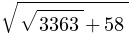

In [34]:
C.norm(2)

In [35]:
(C.T*C).eigenvals()

In [36]:
C.norm().n(), C.norm(2).n()

## Kreuzprodukt

In [37]:
w = Matrix([-1,-2,3])
z = v.cross(w)
z

⎡12⎤
⎢  ⎥
⎢-6⎥
⎢  ⎥
⎣0 ⎦

In [38]:
v.T*z

[0]

In [39]:
w.T*z

[0]

Das Kreuzprodukt $v \times w$ steht senkrecht auf $v$ und $w$.  Seine euklidische Norm ist gleich dem Flächeninhalt des von $v$ und $w$ aufgespannten Parallelogramms.

## Gradient

In [40]:
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
var = [x,y,z]

In [41]:
f = exp(x**2 + 2*y**2 + 3*z**2)
f

In [42]:
gr = Matrix([f.diff(t) for t in var])
gr

⎡      2      2      2⎤
⎢     x  + 2⋅y  + 3⋅z ⎥
⎢2⋅x⋅ℯ                ⎥
⎢                     ⎥
⎢      2      2      2⎥
⎢     x  + 2⋅y  + 3⋅z ⎥
⎢4⋅y⋅ℯ                ⎥
⎢                     ⎥
⎢      2      2      2⎥
⎢     x  + 2⋅y  + 3⋅z ⎥
⎣6⋅z⋅ℯ                ⎦

sympy hat eine Funktion gradient, aber nur in 3D.  Man beachte aber den nächsten Abschnitt.

## Jacobi- und Hessematrix

In [45]:
J = Matrix([f]).jacobian(var)
J

⎡      2      2      2        2      2      2        2      2      2⎤
⎢     x  + 2⋅y  + 3⋅z        x  + 2⋅y  + 3⋅z        x  + 2⋅y  + 3⋅z ⎥
⎣2⋅x⋅ℯ                  4⋅y⋅ℯ                  6⋅z⋅ℯ                ⎦

In [46]:
H = factor(gr.jacobian(var))
H

⎡              ⎛ 2⎞     2     2            ⎛ 2⎞     2     2                 ⎛ 
⎢  ⎛   2    ⎞  ⎝x ⎠  2⋅y   3⋅z             ⎝x ⎠  2⋅y   3⋅z                  ⎝x
⎢2⋅⎝2⋅x  + 1⎠⋅ℯ    ⋅ℯ    ⋅ℯ         8⋅x⋅y⋅ℯ    ⋅ℯ    ⋅ℯ             12⋅x⋅z⋅ℯ  
⎢                                                                             
⎢          ⎛ 2⎞     2     2                    ⎛ 2⎞     2     2             ⎛ 
⎢          ⎝x ⎠  2⋅y   3⋅z         ⎛   2    ⎞  ⎝x ⎠  2⋅y   3⋅z              ⎝x
⎢   8⋅x⋅y⋅ℯ    ⋅ℯ    ⋅ℯ          4⋅⎝4⋅y  + 1⎠⋅ℯ    ⋅ℯ    ⋅ℯ         24⋅y⋅z⋅ℯ  
⎢                                                                             
⎢           ⎛ 2⎞     2     2                ⎛ 2⎞     2     2                  
⎢           ⎝x ⎠  2⋅y   3⋅z                 ⎝x ⎠  2⋅y   3⋅z        ⎛   2    ⎞ 
⎣   12⋅x⋅z⋅ℯ    ⋅ℯ    ⋅ℯ            24⋅y⋅z⋅ℯ    ⋅ℯ    ⋅ℯ         6⋅⎝6⋅z  + 1⎠⋅

2⎞     2     2   ⎤
 ⎠  2⋅y   3⋅z    ⎥
  ⋅ℯ    ⋅ℯ       ⎥
                 ⎥
2⎞     2     2   ⎥
 ⎠  2⋅y   3⋅z    ⎥
  ⋅ℯ    ⋅ℯ      

Das ist die Hesse Matrix.

In [47]:
factor(hessian(f, var)) == H

True

In [53]:
f = Function('f')
f(*var)

In [54]:
hessian(f(x,y,z), var)

⎡   2                  2                  2             ⎤
⎢  ∂                  ∂                  ∂              ⎥
⎢ ───(f(x, y, z))   ─────(f(x, y, z))  ─────(f(x, y, z))⎥
⎢   2               ∂y ∂x              ∂z ∂x            ⎥
⎢ ∂x                                                    ⎥
⎢                                                       ⎥
⎢   2                  2                  2             ⎥
⎢  ∂                  ∂                  ∂              ⎥
⎢─────(f(x, y, z))   ───(f(x, y, z))   ─────(f(x, y, z))⎥
⎢∂y ∂x                 2               ∂z ∂y            ⎥
⎢                    ∂y                                 ⎥
⎢                                                       ⎥
⎢   2                  2                  2             ⎥
⎢  ∂                  ∂                  ∂              ⎥
⎢─────(f(x, y, z))  ─────(f(x, y, z))   ───(f(x, y, z)) ⎥
⎢∂z ∂x              ∂z ∂y                 2             ⎥
⎣                                       ∂z              ⎦

## Definitheit

In [55]:
H1 = H.subs({x:1, y:0, z:-1})
H1

⎡    4              4⎤
⎢ 6⋅ℯ     0    -12⋅ℯ ⎥
⎢                    ⎥
⎢           4        ⎥
⎢  0     4⋅ℯ     0   ⎥
⎢                    ⎥
⎢     4            4 ⎥
⎣-12⋅ℯ    0    42⋅ℯ  ⎦

In [58]:
H1.is_positive   # falscher Befehl

False

In [59]:
H1.det()

In [60]:
for tmp in H1.eigenvals():
    display((tmp, tmp.n()))

In [61]:
ImmutableMatrix(eye(3)).is_positive  # das ist nicht die 
# Antwort auf unsere Frage

False

Hurwitz Kriterium

In [62]:
for j in range(1,4):
    minor = H1[0:j, 0:j]
    display(minor.det())

Also positiv definit

In [63]:
for j in range(1,4):
    minor = -H1[0:j, 0:j]
    display(minor.det())

### Hurwitz-Kriterium

Es sei $M \in \mathbb R^{n\times n}$ eine symmetrische Matrix.

* $M$ ist genau dann positiv definit, wenn alle Unterdeterminanten entlang der Hauptdiagonale positiv sind.
* $M$ ist genau dann negativ definit, wenn die geraden Unterdeterminanten positiv und die ungeraden negativ sind.
* Wenn eine gerade Unterdeterminante negativ ist, dann ist $M$ indefinit.

## Extremwerte in mehreren Veränderlichen

In [64]:
from mpl_toolkits.mplot3d import Axes3D

In [65]:
f = -x**4/2 - x**2*y**2 - y**4/2 + x**3 - 3*x*y**2
fn = lambdify((x,y), f)
f

In [66]:
xn = np.linspace(-5, 5)
yn = np.linspace(-5, 5)
X, Y = np.meshgrid(xn, yn)
W = fn(X, Y)

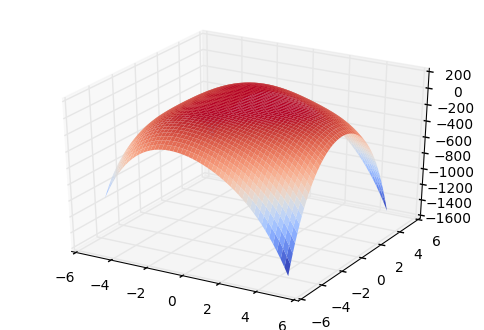

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, rstride=1, cstride=1, linewidth=0,
                cmap=plt.cm.coolwarm);

In [68]:
glg1 = Eq(f.diff(x), 0)
glg2 = Eq(f.diff(y), 0)
gls = {glg1, glg2}
gls

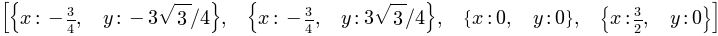

In [69]:
Lsg = solve(gls)
Lsg

In [70]:
H = hessian(f, [x,y])
H

⎡     2            2                     ⎤
⎢- 6⋅x  + 6⋅x - 2⋅y      -4⋅x⋅y - 6⋅y    ⎥
⎢                                        ⎥
⎢                          2            2⎥
⎣   -4⋅x⋅y - 6⋅y      - 2⋅x  - 6⋅x - 6⋅y ⎦

In [71]:
H1 = H.subs(Lsg[0])
H1

⎡       9⋅√3 ⎤
⎢-45/4  ──── ⎥
⎢        4   ⎥
⎢            ⎥
⎢9⋅√3        ⎥
⎢────   -27/4⎥
⎣ 4          ⎦

In [72]:
H1[0,0]

In [73]:
H1.det()

negativ definit

In [74]:
H2 = H.subs(Lsg[1])
H2

⎡        -9⋅√3 ⎤
⎢-45/4   ──────⎥
⎢          4   ⎥
⎢              ⎥
⎢-9⋅√3         ⎥
⎢──────  -27/4 ⎥
⎣  4           ⎦

In [75]:
H2.det()

In [76]:
H3 = H.subs(Lsg[2])
H3

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [77]:
H4 = H.subs(Lsg[3])
H4

⎡-9/2    0  ⎤
⎢           ⎥
⎣ 0    -27/2⎦

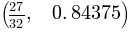

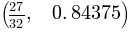

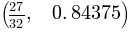

In [78]:
for l in Lsg:
    y0 = f.subs(l)
    display((y0, y0.n()))

In [79]:
from matplotlib.colors import Normalize
norm = Normalize(-.5, 1)

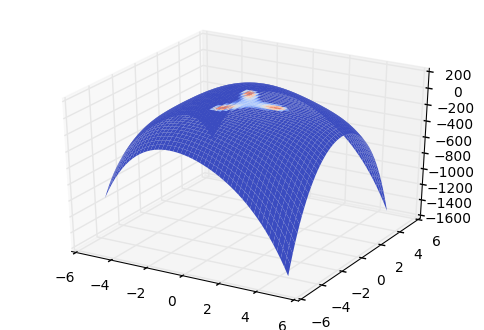

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, rstride=1, cstride=1, linewidth=0,
                cmap=plt.cm.coolwarm, norm=norm);

In [81]:
for l in Lsg:
    display((x.subs(l).n(), y.subs(l).n()))

In [82]:
xn = np.linspace(-1.5, 2, 100)
yn = np.linspace(-1.8, 1.8, 100)
X, Y = np.meshgrid(xn, yn)
W = np.maximum(fn(X, Y), -.1)

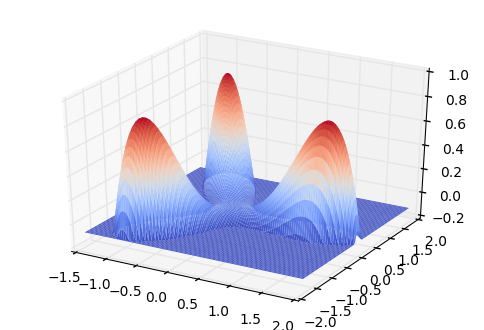

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, rstride=1, cstride=1, linewidth=0,
                cmap=plt.cm.coolwarm);

In [84]:
f.subs(y, 0)

Also Sattel in $(0,0)$.